<a href="https://colab.research.google.com/github/Mokner9/folium_project_n3ts/blob/main/Kinza_Muhammad_Raihan_X_4_Kota_Surabaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Tugas Project

1. import folium, pandas, geopandas, dan drive.
2. load data shapefile, pilih kota/kabupaten yang akan dianalisis
3. load data csv dan proses merge/join data
4. load peta choropleth

In [ ]:
# Import Library

import folium
import pandas as pd
import geopandas as gpd
from google.colab import drive

Pilih nama kota / kabupaten kalian. jika tidak muncul pastikan namanya sesuai dengan nama di link berikut :
https://geoservices.big.go.id/portal/apps/webappviewer/index.html?id=cb58db080712468cb4bfd408dbde3d70

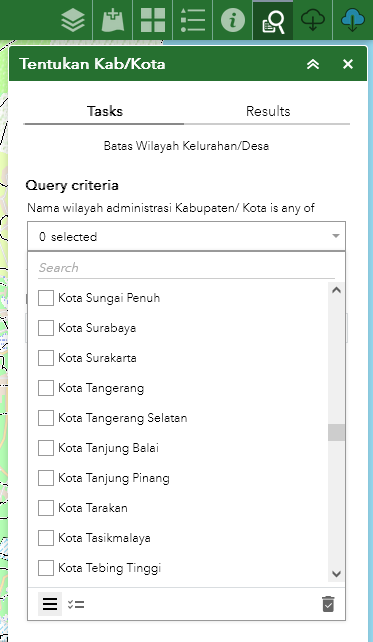

In [55]:
# Read Data Shapefile

drive.mount('/content/drive')

# Shapefile Admin Indonesia (tidak usah diubah2) Warning! File besar 1.4gb
indonesia_admin = gpd.read_file('/content/drive/MyDrive/ADMIN_INDO/ADMINISTRASI_AR_DESAKEL_10K.shp')

# Pilih Kota/Kabupaten yang ingin ditampilkan, contoh 'Kota Tangerang Selatan'
aoi_admin = indonesia_admin[indonesia_admin['WADMKK'] == 'Kota Surabaya']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
# CSV file path
csv_path = '/content/Surabaya_Kelurahan_Jumlah Penduduk.csv'

# Read shapefile
admin_gdf = aoi_admin

# Read CSV data
csv_data = pd.read_csv(csv_path, header = 2, delimiter= ';')

print(csv_data.head())
print(admin_gdf.head())
# Convert column names to lowercase
csv_data['Kelurahan'] = csv_data['Kelurahan'].str.lower().str.replace(' ', '')
admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.lower().str.replace(' ', '')
#csv_data['Jumlah_KK'] = csv_data['Jumlah_KK'].astype(str).str.replace('.', '')
#csv_data['Jumlah_KK'] = pd.to_numeric(csv_data['Jumlah_KK'])

# Fix typo to merge properly
#admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.replace('pondokjagungt', 'pondokjagung')
#csv_data['Kelurahan'] = csv_data['Kelurahan'].str.replace('perigibaru', 'parigibaru')

# Merge data
merged_data = pd.merge(admin_gdf, csv_data, left_on='NAMOBJ', right_on='Kelurahan', how='left')

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged_data, geometry=merged_data.geometry)

print(merged_gdf.head())
# Now you can use merged_gdf for further analysis and visualization

       Kecamatan      Kelurahan  Jumlah Penduduk
0  KARANG PILANG  KARANG PILANG             8883
1  KARANG PILANG        KEBRAON            29288
2  KARANG PILANG        KEDURUS            27492
3  KARANG PILANG    WARU GUNUNG            10045
4  KARANG PILANG      SIDOSERMO            13734
       OBJECTID            NAMOBJ       FCODE REMARK  \
74664   74673.0         airlangga  BA03070040   None   
74692   74701.0  alun-aluncontong  BA03070040   None   
74702   74711.0             ampel  BA03070040   None   
74733   74742.0          asemrowo  BA03070040   None   
74758   74767.0      babatjerawat  BA03070040   None   

                                           METADATA     SRS_ID KDBBPS KDCBPS  \
74664  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
74692  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
74702  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
74733  TASWIL1000020230928_DATA_BATAS_DESAKELURAH

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [61]:
# Create a base map
m = folium.Map(location=[-7.2585837490546865, 112.75731032344733], zoom_start=11)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=["Kelurahan", "Jumlah Penduduk"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah Penduduk"
).add_to(m)

jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='Jumlah_KK',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKD','Jumlah Penduduk'],
        aliases=['Kelurahan','Jumlah Penduduk']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

In [67]:
# Create a base map
m = folium.Map(location=[-7.2585837490546865, 112.75731032344733], zoom_start=11)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name="choropleth",
    data=merged_gdf,
    columns=["Kelurahan", "Jumlah Penduduk"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah Penduduk"
).add_to(m)

# Create/import data sma
data_sma = pd.read_csv('/content/SMAN Surabaya.csv')

data_sma['geometry'] = gpd.GeoSeries.from_wkt(data_sma['WKT'])

# Extract latitude and longitude from Point geometries
data_sma['latitude'] = data_sma['geometry'].apply(lambda x: x.y)
data_sma['longitude'] = data_sma['geometry'].apply(lambda x: x.x)

# Add markers to the map
# Create a marker layer
marker_layer = folium.FeatureGroup(name="SMAN Surabaya")

# Add markers to the layer
for i in range(0, len(data_sma)):
    folium.Marker([data_sma.iloc[i]['latitude'], data_sma.iloc[i]['longitude']], popup=data_sma.iloc[i]['nama']).add_to(marker_layer)

m.add_child(marker_layer)

# Add Jumlah_KK layer map
jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='Jumlah KK',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['NAMOBJ','Jumlah Penduduk'],
        aliases=['Kelurahan','Jumlah Penduduk']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Analysis Question:
Kelurahan mana yang memiliki jumlah KK dengan kelas tertinggi (Merah Tua)?

Jawab: Tanah Kali Kedinding, Sidotopo Wetan, dan Wonokusumo


Kelurahan apa saja yang tidak terdapat Sekolah Negeri?

Jawab:
1. Sumber Rejo
2. Benowo
3. Pakal
4. Babat Jerawat
5. Romokalisari
6. Tambak Oso Wilangun
7. Kandangan
8. Tambak Sarioso
9. Manukan Wetan
10. Banjar Sugihan
11. Beringin
12. Made
13. Lakarsantri
14. Jeruk
15. Sambikerep
16. Lontar
17. Karang Poh
18. Balongsari
19. Tandes
20. Genting Kalianak
21. Asem Rowo
22. Sukomanunggal
23. Tanjungsari
24. Simomulyo Baru
25. Simomulyo
26. Petemon
27. Tembok Dukuh
28. Morokrembangan
29. Dupak
30. Jepara
31. Kemayoran
32. Krembangan Selatan
33. Krembangan Utara
34. Perak Timur
35. Perak Utara
36. Perak Barat
37. Nyamplungan
38. Ampel
39. Simolawang
40. Sidodadi
41. Simokerto
42. Sidotopo
43. Pegirian
44. Sidotopo Wetan
45. Wonokusumo
46. Bulak Banteng
47. Tambak Wedi
48. Kedung Cowek
49. Bulak
50. Dukuh Setro
51. Gading
52. Kenjeran
53. Tambakrejo
54. Kapasan
55. Bongkaran
56. Peneleh
57. Alun-alun Contong
58. Bubutan
59. Gundih
60. Genteng
61. Kedungdoro
62. Wonorejo
63. Kupang Krajan
64. Tegalsari
65. Gubeng
66. Airlangga
67. Mojo
68. Pacarkembang
69. Tambaksari
70. Ploso
71. Rangkah
72. Kalijudan
73. Mulyorejo
74. Dukuh Sutorejo
75. Sukolilo Baru
76. Kalisari
77. Keputih
78. Kejawan Putih Tambak
79. Gebang Putih
80. Manyar Sabrangan
81. Klampis Ngasem
82. Menur Pumpungan
83. Medokan Semampir
84. Semolowaru
85. Nginden Jangkungan
86. Baratajaya
87. Kertajaya
88. Pucang Sewu
89. Ngagel Rejo
90. Ngagel
91. Wonokromo
92. Keputran
93. DR. Soetomo
94. Darmo
95. Pakis
96. Banyu Urip
97. Putat Jaya
98. Dukuh Kupang
99. Sawunggaling
100. Gunung Sari
101. Dukuh Pakis
102. Putat Gede
103. Sonokwijenan
104. Pradah Kalikendal
105. Babatan
106. Lidah Wetan
107. Bangkingan
108. Sumurwelut
109. Waru Gunung
110. Karang Pilang
111. Kebraon
112. Kedurus
113. Wiyung
114. Jajar Tunggal
115. Jambangan
116. Kebonsari
117. Pagesangan
118. Menanggal
119. Gayungan
120. Ketintang
121. Margorejo
122. Jagir
123. Bendul Merisi
124. Sidosermo
125. Kendangsari
126. Tenggilis Mejoyo
127. Kutisari
128. Siwalankerto
129. Kedung Baruk
130. Penjaringansari
131. Rungkut Menanggal
132. Rungkut Tengah
133. Gunung Anyar
134. Medokan Ayu
135. Gunung Anyar Tambak